<a href="https://colab.research.google.com/github/ChangHuiLai/Polaris/blob/main/Technical%20analysis_Stacking_0228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://10mohi6.medium.com/super-easy-python-stock-price-forecasting-using-ensemble-stacking-machine-learning-a0425e708c3d

In [ ]:
!pip install scikit-learn pandas_datareader rgf-python xgboost
!pip install yfinance

In [ ]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from rgf.sklearn import RGFClassifier
from sklearn.neural_network import MLPClassifier
import yfinance as yf

df = yf.download("AAPL", start="2010-11-01", end="2020-11-01")
df["Diff"] = df.Close.diff()
df["SMA_2"] = df.Close.rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]
df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)
df = df.drop(
   ["Open", "High", "Low", "Close", "Volume", "Diff"],
   axis=1,
).dropna()
# print(df)
X = df.drop(["y"], axis=1).values
y = df["y"].values
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.2,
   shuffle=False,
)
estimators = [
   ('xgb', xgb.XGBClassifier()),
   ('lr', LogisticRegression()),
   ('nb', BernoulliNB()),
   ('rgf', RGFClassifier()),
   ('svm', make_pipeline(StandardScaler(), SVC(gamma="auto"))),
   ('mlp', make_pipeline(StandardScaler(), MLPClassifier(random_state=0, shuffle=False))),
]
clf = StackingClassifier(estimators, LogisticRegression())
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

[*********************100%***********************]  1 of 1 completed


0.5436507936507936


In [ ]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from rgf.sklearn import RGFClassifier
from sklearn.neural_network import MLPClassifier
import yfinance as yf

In [ ]:
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df["Diff"] = df.Close.diff()  # 計算當日收盤價變化量
df["SMA_2"] = df.Close.rolling(2).mean()  # 計算2日簡單移動平均
df["Force_Index"] = df["Close"] * df["Volume"]  # 計算動量指標 Force Index
df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

df = df.drop(
   ["Open", "High", "Low", "Close", "Volume", "Diff"],
   axis=1,
).dropna()

In [ ]:
X = df.drop(["y"], axis=1).values  # 特徵 (技術指標)
y = df["y"].values  # 標籤 (漲跌)
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.2,
   shuffle=False,
)

In [ ]:
estimators = [
   ('xgb', xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)),  # XGBoost
   ('lr', LogisticRegression(max_iter=500)),  # 增加最大迭代次數，提高收斂穩定性
   ('nb', BernoulliNB()),  # 貝氏分類
   ('rgf', RGFClassifier(max_leaf=1000, algorithm="RGF_Sib", loss="Log")),  # 調整 RGF 參數
   ('svm', make_pipeline(StandardScaler(), SVC(gamma="auto"))),  # SVM（標準化+SVC）
   ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128, 64),
                                                         max_iter=500,
                                                         batch_size=32,
                                                         learning_rate_init=0.01,
                                                         random_state=0,
                                                         shuffle=False))),  # MLP 神經網絡
]

clf = StackingClassifier(estimators, LogisticRegression(max_iter=500))

In [ ]:
"""
estimators = [
   ('xgb', xgb.XGBClassifier()),  # XGBoost
   ('lr', LogisticRegression()),  # 邏輯回歸
   ('nb', BernoulliNB()),  # 貝氏分類
   ('rgf', RGFClassifier()),  # Regularized Greedy Forest
   ('svm', make_pipeline(StandardScaler(), SVC(gamma="auto"))),  # SVM（標準化+SVC）
   ('mlp', make_pipeline(StandardScaler(), MLPClassifier(random_state=0, shuffle=False))),  # MLP神經網絡
]
clf = StackingClassifier(estimators, LogisticRegression())
"""

'\nestimators = [\n   (\'xgb\', xgb.XGBClassifier()),  # XGBoost\n   (\'lr\', LogisticRegression()),  # 邏輯回歸\n   (\'nb\', BernoulliNB()),  # 貝氏分類\n   (\'rgf\', RGFClassifier()),  # Regularized Greedy Forest\n   (\'svm\', make_pipeline(StandardScaler(), SVC(gamma="auto"))),  # SVM（標準化+SVC）\n   (\'mlp\', make_pipeline(StandardScaler(), MLPClassifier(random_state=0, shuffle=False))),  # MLP神經網絡\n]\nclf = StackingClassifier(estimators, LogisticRegression())\n'

In [ ]:
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5225409836065574


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# 下載 0050.TW 股票數據
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

# 計算技術指標
df["Diff"] = df["Close"].diff()
df["SMA_2"] = df["Close"].rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]

# 計算 RSI（相對強弱指標）
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df["RSI"] = compute_RSI(df)

# 計算 MACD（指數移動平均線）
def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data["Close"].ewm(span=short_window, adjust=False).mean()
    long_ema = data["Close"].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

df["MACD"], df["MACD_Signal"] = compute_MACD(df)

# 設定預測目標 (y)
df["y"] = df["Close"].shift(-1)  # 預測下一天的收盤價

# 刪除不需要的欄位
df = df.drop(["Open", "High", "Low", "Volume", "Diff"], axis=1).dropna()

# 劃分訓練集與測試集 (前90% 為訓練集，最後10% 為測試集)
split_idx = int(len(df) * 0.9)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

X_train = train_df.drop("y", axis=1).values
y_train = train_df["y"].values
X_test = test_df.drop("y", axis=1).values
y_test = test_df["y"].values

# 定義 Stacking 模型 (改為回歸任務)
estimators = [
   ('xgb', xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)),  # XGBoost
   ('lr', LinearRegression()),  # 線性回歸
   ('svr', make_pipeline(StandardScaler(), SVR())),  # 支持向量回歸
   ('mlp', make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(128, 64),
                                                         max_iter=500,
                                                         batch_size=32,
                                                         learning_rate_init=0.01,
                                                         random_state=0)))  # MLP 神經網絡
]

clf = StackingRegressor(estimators, final_estimator=LinearRegression())

# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 評估模型
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")

[*********************100%***********************]  1 of 1 completed


Train RMSE: 0.9549, Test RMSE: 2.7083
Train MAE: 0.6395, Test MAE: 1.7974
Train R2: 0.9989, Test R2: 0.9856


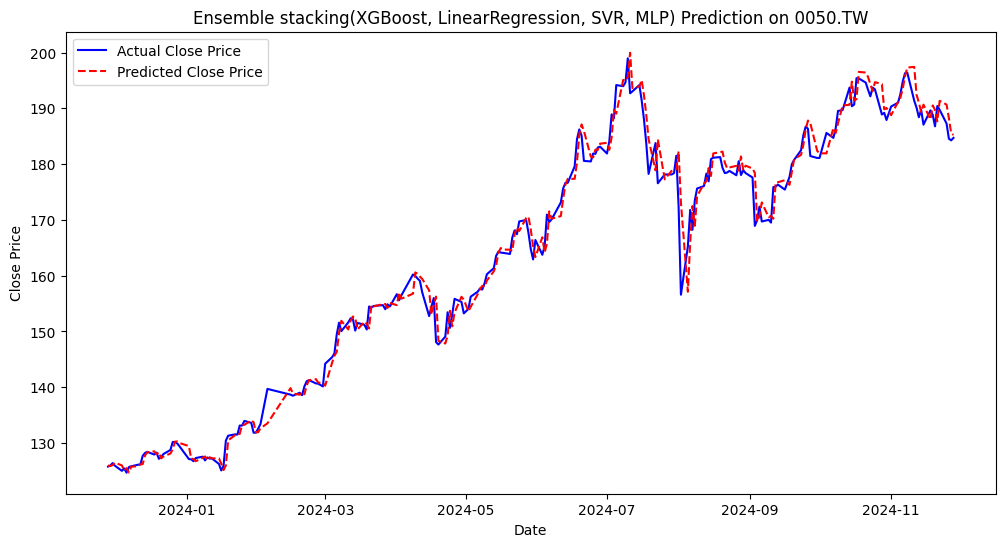

In [ ]:
import matplotlib.pyplot as plt
# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, y_test, label="Actual Close Price", color="blue")
plt.plot(test_df.index, y_pred_test, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Ensemble stacking(XGBoost, LinearRegression, SVR, MLP) Prediction on 0050.TW")
plt.legend()
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 下載 0050.TW 股票數據
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

# 計算技術指標
df["Diff"] = df["Close"].diff()
df["SMA_2"] = df["Close"].rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]

# 計算 RSI
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df["RSI"] = compute_RSI(df)

# 計算 MACD
def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data["Close"].ewm(span=short_window, adjust=False).mean()
    long_ema = data["Close"].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

df["MACD"], df["MACD_Signal"] = compute_MACD(df)

# 設定預測目標 (y)
df["y"] = df["Close"].shift(-1)  # 預測下一天的收盤價

# 刪除不需要的欄位
df = df.drop(["Open", "High", "Low", "Volume", "Diff"], axis=1).dropna()

# 劃分訓練集與測試集 (前90% 為訓練集，最後10% 為測試集)
split_idx = int(len(df) * 0.9)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

X_train = train_df.drop("y", axis=1).values
y_train = train_df["y"].values
X_test = test_df.drop("y", axis=1).values
y_test = test_df["y"].values

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 需要 3D 數據 (samples, timesteps, features)
def create_lstm_dataset(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train, time_steps)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test, time_steps)

# 定義 LSTM 模型
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(25, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
    return model

# 建立 LSTM 模型
lstm_model = build_lstm_model((time_steps, X_train.shape[1]))
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# LSTM 預測
lstm_train_pred = lstm_model.predict(X_train_lstm).flatten()
lstm_test_pred = lstm_model.predict(X_test_lstm).flatten()

# 調整 LSTM 預測結果的形狀，使其符合其他模型的輸出
X_train_final = X_train_scaled[time_steps:]
X_test_final = X_test_scaled[time_steps:]
y_train_final = y_train[time_steps:]
y_test_final = y_test[time_steps:]

# 定義 Stacking 模型
estimators = [
   ('xgb', xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)),
   ('svr', make_pipeline(StandardScaler(), SVR())),
   ('mlp', make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(128, 64),
                                                         max_iter=500,
                                                         batch_size=32,
                                                         learning_rate_init=0.01,
                                                         random_state=0))),
   ('lstm', LinearRegression())  # LSTM 預測值作為額外特徵
]

# Stacking 最終模型
stacking_model = StackingRegressor(estimators, final_estimator=LinearRegression())

# 訓練 Stacking 模型
stacking_model.fit(X_train_final, y_train_final)

# 預測
y_pred_train = stacking_model.predict(X_train_final)
y_pred_test = stacking_model.predict(X_test_final)

# 評估模型
train_rmse = np.sqrt(mean_squared_error(y_train_final, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test_final, y_pred_test))
train_mae = mean_absolute_error(y_train_final, y_pred_train)
test_mae = mean_absolute_error(y_test_final, y_pred_test)
train_r2 = r2_score(y_train_final, y_pred_train)
test_r2 = r2_score(y_test_final, y_pred_test)

print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4129.7446
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 568.7809
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 141.0511
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 14.0395
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.1165
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4376
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1974
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8125
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2049
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8913
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6926
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0789
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5718
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.6692
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1819
Epoch 1

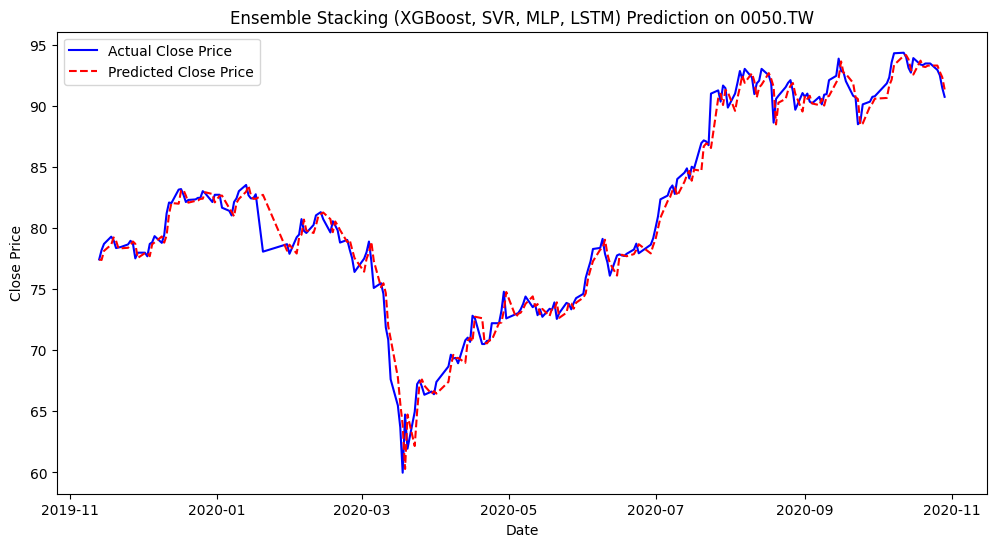

In [ ]:
# 調整時間索引，確保與 y_pred_test 對齊
adjusted_test_index = test_df.index[time_steps:]

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.plot(adjusted_test_index, y_test[time_steps:], label="Actual Close Price", color="blue")
plt.plot(adjusted_test_index, y_pred_test, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Ensemble Stacking (XGBoost, SVR, MLP, LSTM) Prediction on 0050.TW")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# 下載 0050.TW 股票數據
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

# 計算技術指標
df["Diff"] = df["Close"].diff()
df["SMA_2"] = df["Close"].rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]

# 計算 RSI
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df["RSI"] = compute_RSI(df)

# 計算 MACD
def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data["Close"].ewm(span=short_window, adjust=False).mean()
    long_ema = data["Close"].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

df["MACD"], df["MACD_Signal"] = compute_MACD(df)

# 設定預測目標 (y)
df["y"] = df["Close"].shift(-1)  # 預測下一天的收盤價

# 刪除不需要的欄位
df = df.drop(["Open", "High", "Low", "Volume", "Diff"], axis=1).dropna()

# 劃分訓練集與測試集 (前90% 為訓練集，最後10% 為測試集)
split_idx = int(len(df) * 0.9)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

X_train = train_df.drop("y", axis=1).values
y_train = train_df["y"].values
X_test = test_df.drop("y", axis=1).values
y_test = test_df["y"].values

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 需要 3D 數據 (samples, timesteps, features)
def create_lstm_dataset(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train, time_steps)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test, time_steps)

# 定義 LSTM 模型（使用 Bidirectional LSTM 改善預測滯後）
def build_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, input_shape=input_shape)),
        LSTM(64),
        Dense(32, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.005), loss="mse")
    return model

# 建立 LSTM 模型
lstm_model = build_lstm_model((time_steps, X_train.shape[1]))
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# LSTM 預測
lstm_train_pred = lstm_model.predict(X_train_lstm).flatten()
lstm_test_pred = lstm_model.predict(X_test_lstm).flatten()

# 調整 LSTM 預測結果的形狀，使其符合其他模型的輸出
X_train_final = np.hstack((X_train_scaled[time_steps:], lstm_train_pred.reshape(-1, 1)))
X_test_final = np.hstack((X_test_scaled[time_steps:], lstm_test_pred.reshape(-1, 1)))
y_train_final = y_train[time_steps:]
y_test_final = y_test[time_steps:]

# 定義 Stacking 模型
estimators = [
   ('xgb', xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)),
   ('svr', make_pipeline(StandardScaler(), SVR())),
   ('mlp', make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(128, 64),
                                                         max_iter=500,
                                                         batch_size=32,
                                                         learning_rate_init=0.01,
                                                         random_state=0)))
]

# Stacking 最終模型
stacking_model = StackingRegressor(estimators, final_estimator=LinearRegression())

# 訓練 Stacking 模型
stacking_model.fit(X_train_final, y_train_final)

# 預測
y_pred_train = stacking_model.predict(X_train_final)
y_pred_test = stacking_model.predict(X_test_final)

# 評估模型
train_rmse = np.sqrt(mean_squared_error(y_train_final, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test_final, y_pred_test))
train_mae = mean_absolute_error(y_train_final, y_pred_train)
test_mae = mean_absolute_error(y_test_final, y_pred_test)
train_r2 = r2_score(y_train_final, y_pred_train)
test_r2 = r2_score(y_test_final, y_pred_test)

print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 4346.4443
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 622.2292
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 221.2029
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 25.8202
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5448
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8055
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.4177
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0241
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.6811
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.9013
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2350
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4905
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0306
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3197
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.8199
Epoch 1

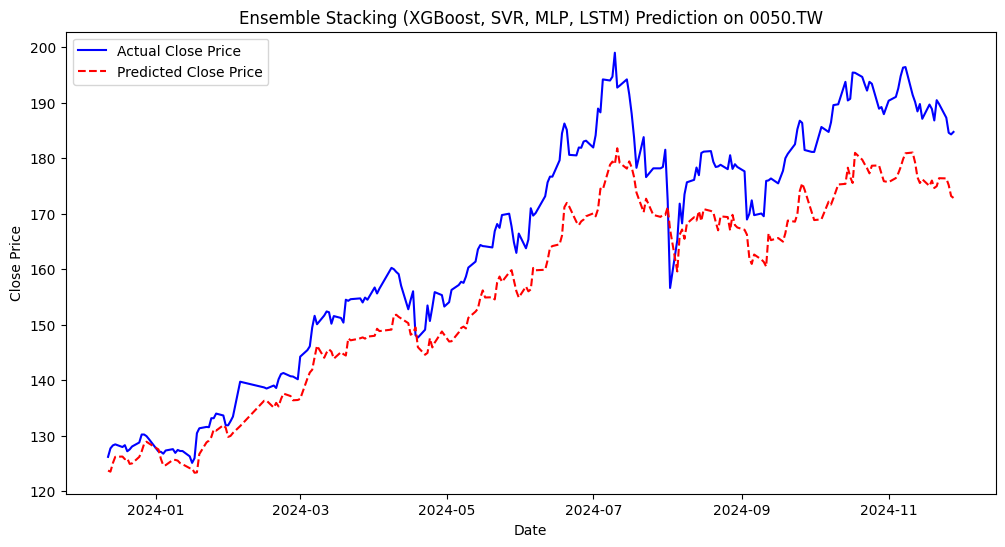

In [ ]:
# 調整時間索引，確保與 y_pred_test 對齊
adjusted_test_index = test_df.index[time_steps:]

# 繪製預測結果
plt.figure(figsize=(12, 6))
plt.plot(adjusted_test_index, y_test[time_steps:], label="Actual Close Price", color="blue")
plt.plot(adjusted_test_index, y_pred_test, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Ensemble Stacking (XGBoost, SVR, MLP, LSTM) Prediction on 0050.TW")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# 下載 0050.TW 股票數據
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

# 計算技術指標
df["Diff"] = df["Close"].diff()
df["SMA_2"] = df["Close"].rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]

# 計算 RSI
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df["RSI"] = compute_RSI(df)

# 計算 MACD
def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data["Close"].ewm(span=short_window, adjust=False).mean()
    long_ema = data["Close"].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

df["MACD"], df["MACD_Signal"] = compute_MACD(df)

# 設定預測目標 (y)
df["y"] = df["Close"].shift(-1)  # 預測下一天的收盤價

# 刪除不需要的欄位
df = df.drop(["Open", "High", "Low", "Volume", "Diff"], axis=1).dropna()

# 轉換 y 為 0/1 (1 = 上漲, 0 = 下跌)
df["y_class"] = (df["y"].diff() > 0).astype(int)  # 如果明天收盤價 > 今天，標記為 1

# **確保 `train_df` 和 `test_df` 包含 `y_class`**
split_idx = int(len(df) * 0.9)
train_df = df.iloc[:split_idx].copy()  # 用 .copy() 確保 DataFrame 是獨立的
test_df = df.iloc[split_idx:].copy()

# 重新定義 X, y
X_train = train_df.drop(["y", "y_class"], axis=1).values  # 這裡要包含 "y"
y_train = train_df["y_class"].values
X_test = test_df.drop(["y", "y_class"], axis=1).values
y_test = test_df["y_class"].values

# 定義 Stacking 分類模型
estimators = [
   ('xgb', xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)),
   ('svr', make_pipeline(StandardScaler(), SVR())),  # SVR 不適用於分類，這裡建議替換成 `SVC`
   ('mlp', make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(128, 64),
                                                         max_iter=500,
                                                         batch_size=32,
                                                         learning_rate_init=0.01,
                                                         random_state=0)))
]

clf = StackingClassifier(estimators, final_estimator=LogisticRegression())

# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# 計算分類準確率
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

[*********************100%***********************]  1 of 1 completed


Train Accuracy: 0.1718, Test Accuracy: 0.4979


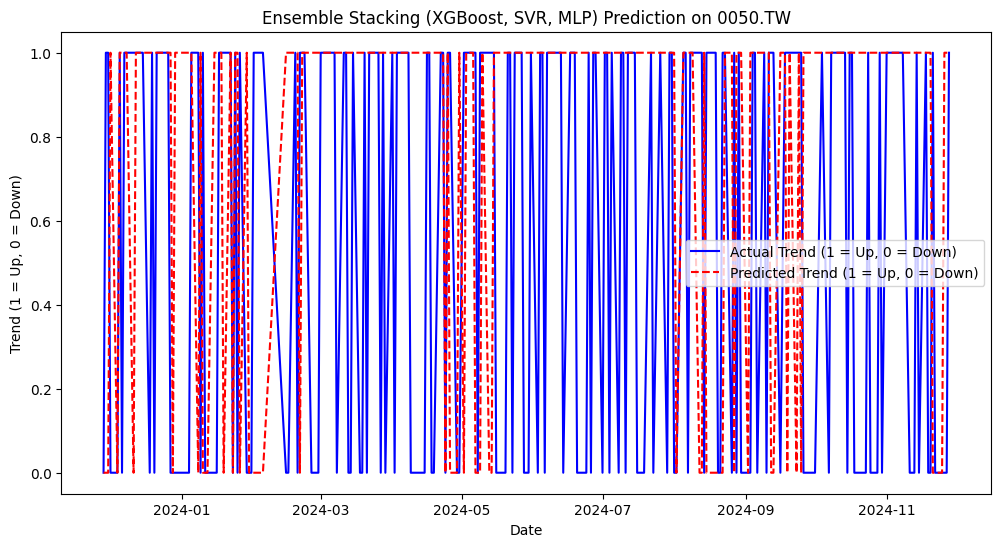

In [ ]:
import matplotlib.pyplot as plt

# 繪製預測結果
plt.figure(figsize=(12, 6))

# 繪製實際的股價變化方向
plt.plot(test_df.index, y_test, label="Actual Trend (1 = Up, 0 = Down)", color="blue", linestyle="-")

# 繪製預測的股價變化方向
plt.plot(test_df.index, y_pred_test, label="Predicted Trend (1 = Up, 0 = Down)", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Trend (1 = Up, 0 = Down)")
plt.title("Ensemble Stacking (XGBoost, SVR, MLP) Prediction on 0050.TW")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4937 - loss: 0.7037
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4987 - loss: 0.6945
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5029 - loss: 0.6957
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5127 - loss: 0.6937
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5093 - loss: 0.6970
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4878 - loss: 0.6988
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4944 - loss: 0.6929
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5221 - loss: 0.6933
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5135 - loss: 0.6931
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5196 - loss: 0.6921
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5250 - loss: 0.6922
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy

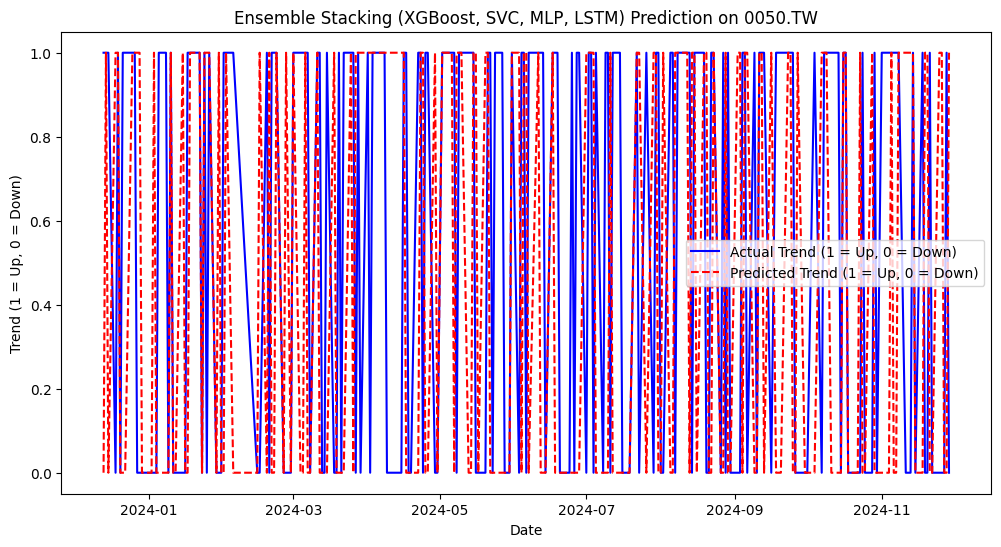

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# 下載 0050.TW 股票數據
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

# 計算技術指標
df["Diff"] = df["Close"].diff()
df["SMA_2"] = df["Close"].rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]

# 計算 RSI
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df["RSI"] = compute_RSI(df)

# 計算 MACD
def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data["Close"].ewm(span=short_window, adjust=False).mean()
    long_ema = data["Close"].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

df["MACD"], df["MACD_Signal"] = compute_MACD(df)

# 設定預測目標 (y_class) - 預測明天是上漲 (1) 或 下跌 (0)
df["y_class"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

# 刪除不需要的欄位
df = df.drop(["Open", "High", "Low", "Volume", "Diff"], axis=1).dropna()

# 劃分訓練集與測試集 (前90% 為訓練集，最後10% 為測試集)
split_idx = int(len(df) * 0.9)
train_df = df.iloc[:split_idx].copy()
test_df = df.iloc[split_idx:].copy()

# 重新定義 X, y
X_train = train_df.drop("y_class", axis=1).values
y_train = train_df["y_class"].values
X_test = test_df.drop("y_class", axis=1).values
y_test = test_df["y_class"].values

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 需要 3D 數據 (samples, timesteps, features)
def create_lstm_dataset(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train, time_steps)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test, time_steps)

# 定義 LSTM 模型
def build_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True, input_shape=input_shape)),
        LSTM(64),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")  # 分類問題，使用 sigmoid 激活函數
    ])
    model.compile(optimizer=Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# 建立 LSTM 模型
lstm_model = build_lstm_model((time_steps, X_train.shape[1]))
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# LSTM 預測
lstm_train_pred = lstm_model.predict(X_train_lstm).flatten()
lstm_test_pred = lstm_model.predict(X_test_lstm).flatten()

# 轉換 LSTM 預測結果為 0 或 1
lstm_train_pred = (lstm_train_pred > 0.5).astype(int)
lstm_test_pred = (lstm_test_pred > 0.5).astype(int)

# 調整 LSTM 預測結果的形狀，使其符合其他模型的輸出
X_train_final = np.hstack((X_train_scaled[time_steps:], lstm_train_pred.reshape(-1, 1)))
X_test_final = np.hstack((X_test_scaled[time_steps:], lstm_test_pred.reshape(-1, 1)))
y_train_final = y_train[time_steps:]
y_test_final = y_test[time_steps:]

# 定義 Stacking 分類模型
estimators = [
   ('xgb', xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8)),
   ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),  # 改用 SVC 而不是 SVR
   ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128, 64),
                                                          max_iter=500,
                                                          batch_size=32,
                                                          learning_rate_init=0.01,
                                                          random_state=0)))
]

# Stacking 最終模型
stacking_model = StackingClassifier(estimators, final_estimator=LogisticRegression())

# 訓練 Stacking 分類模型
stacking_model.fit(X_train_final, y_train_final)

# 預測
y_pred_train = stacking_model.predict(X_train_final)
y_pred_test = stacking_model.predict(X_test_final)

# 計算分類準確率
train_acc = accuracy_score(y_train_final, y_pred_train)
test_acc = accuracy_score(y_test_final, y_pred_test)

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test_final, y_pred_test))

# 繪製預測結果
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_df.index[time_steps:], y_test_final, label="Actual Trend (1 = Up, 0 = Down)", color="blue", linestyle="-")
plt.plot(test_df.index[time_steps:], y_pred_test, label="Predicted Trend (1 = Up, 0 = Down)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Trend (1 = Up, 0 = Down)")
plt.title("Ensemble Stacking (XGBoost, SVC, MLP, LSTM) Prediction on 0050.TW")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4994 - loss: 0.7050
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5029 - loss: 0.6930
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.4786 - loss: 0.6985
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.4939 - loss: 0.6970
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5312 - loss: 0.6929
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5394 - loss: 0.6905
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5169 - loss: 0.6919
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4934 - loss: 0.6944
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5331 - loss: 0.6893
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5250 - loss: 0.6923
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5216 - loss: 0.6935
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5094 - 

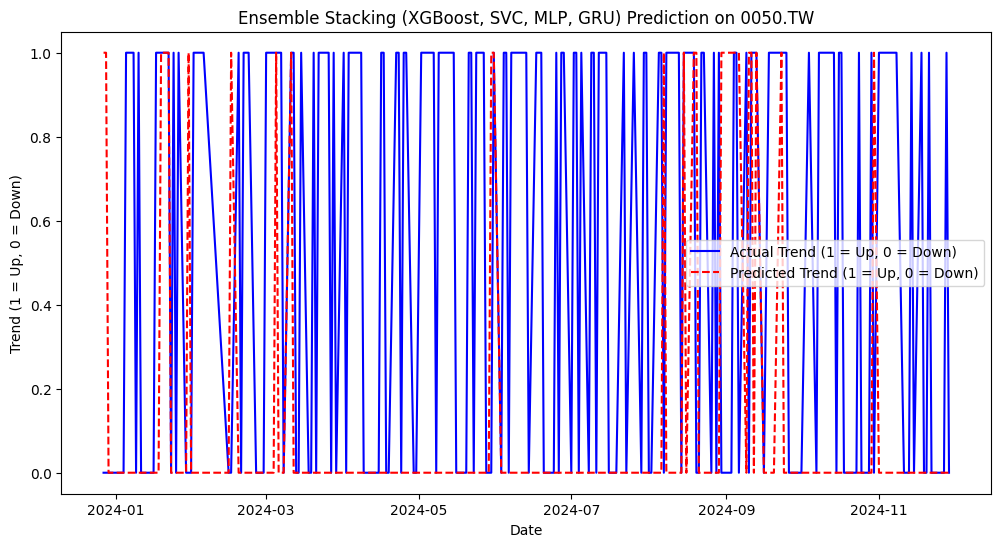

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

# 下載 0050.TW 股票數據
df = yf.download("0050.TW", start="2014-12-01", end="2024-12-01")

# 計算技術指標
df["Diff"] = df["Close"].diff()
df["SMA_2"] = df["Close"].rolling(2).mean()
df["Force_Index"] = df["Close"] * df["Volume"]

# 計算 RSI
def compute_RSI(data, window=14):
    delta = data["Close"].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df["RSI"] = compute_RSI(df)

# 計算 MACD
def compute_MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data["Close"].ewm(span=short_window, adjust=False).mean()
    long_ema = data["Close"].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

df["MACD"], df["MACD_Signal"] = compute_MACD(df)

# 設定預測目標 (y_class) - 預測明天是上漲 (1) 或 下跌 (0)
df["y_class"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

# 刪除不需要的欄位
df = df.drop(["Open", "High", "Low", "Volume", "Diff"], axis=1).dropna()

# 劃分訓練集與測試集 (前90% 為訓練集，最後10% 為測試集)
split_idx = int(len(df) * 0.9)
train_df = df.iloc[:split_idx].copy()
test_df = df.iloc[split_idx:].copy()

# 重新定義 X, y
X_train = train_df.drop("y_class", axis=1).values
y_train = train_df["y_class"].values
X_test = test_df.drop("y_class", axis=1).values
y_test = test_df["y_class"].values

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 需要 3D 數據 (samples, timesteps, features)
def create_lstm_dataset(X, y, time_steps=30):  # 更新 time_steps 為 20
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 20
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train, time_steps)
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test, time_steps)

# 定義 GRU 模型（加入 Dropout，改用 Tanh）
def build_gru_model(input_shape):
    model = Sequential([
        Bidirectional(GRU(64, return_sequences=True, input_shape=input_shape, activation="tanh")),
        Dropout(0.2),  # 加入 Dropout 層，減少過擬合
        GRU(64, activation="tanh"),  # 內部 GRU 層
        Dropout(0.2),  # 再加一層 Dropout
        Dense(32, activation="tanh"),  # 隱藏層
        Dense(1, activation="sigmoid")  # 分類問題，使用 sigmoid
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# 建立 GRU 模型
gru_model = build_gru_model((time_steps, X_train.shape[1]))

# 訓練 GRU 模型
gru_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# GRU 預測
gru_train_pred = gru_model.predict(X_train_lstm).flatten()
gru_test_pred = gru_model.predict(X_test_lstm).flatten()

# 轉換 GRU 預測結果為 0 或 1
gru_train_pred = (gru_train_pred > 0.5).astype(int)
gru_test_pred = (gru_test_pred > 0.5).astype(int)

# 更新輸入特徵，將 GRU 預測值加入 X
X_train_final = np.hstack((X_train_scaled[time_steps:], gru_train_pred.reshape(-1, 1)))
X_test_final = np.hstack((X_test_scaled[time_steps:], gru_test_pred.reshape(-1, 1)))
y_train_final = y_train[time_steps:]
y_test_final = y_test[time_steps:]

# 定義 Stacking 分類模型
estimators = [
   ('xgb', xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, subsample=0.8)),
   ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),  # 改用 SVC 而不是 SVR
   ('mlp', make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128, 64),
                                                          max_iter=500,
                                                          batch_size=32,
                                                          learning_rate_init=0.05,
                                                          random_state=0)))
]

# Stacking 最終模型
stacking_model = StackingClassifier(estimators, final_estimator=LogisticRegression())

# 訓練 Stacking 分類模型
stacking_model.fit(X_train_final, y_train_final)

# 預測
y_pred_train = stacking_model.predict(X_train_final)
y_pred_test = stacking_model.predict(X_test_final)

# 計算分類準確率
train_acc = accuracy_score(y_train_final, y_pred_train)
test_acc = accuracy_score(y_test_final, y_pred_test)

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test_final, y_pred_test))

# 繪製預測結果
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_df.index[time_steps:], y_test_final, label="Actual Trend (1 = Up, 0 = Down)", color="blue", linestyle="-")
plt.plot(test_df.index[time_steps:], y_pred_test, label="Predicted Trend (1 = Up, 0 = Down)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Trend (1 = Up, 0 = Down)")
plt.title("Ensemble Stacking (XGBoost, SVC, MLP, GRU) Prediction on 0050.TW")
plt.legend()
plt.show()